In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def predict(X, theta):
    return np.dot(X, theta)

def compute_cost(X, y, theta):
    m = len(y)
    predictions = predict(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, iterations):
    m = len(y_train)
    train_cost_history = []
    val_cost_history = []
    
    for _ in range(iterations):
        predictions = predict(X_train, theta)
        # Compute gradients
        gradients = (1/m) * np.dot(X_train.T, (predictions - y_train))
        # Update parameters
        theta -= learning_rate * gradients
        
        # Compute and store both training and validation costs
        train_cost = compute_cost(X_train, y_train, theta)
        val_cost = compute_cost(X_val, y_val, theta)
        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)
    
    return theta, train_cost_history, val_cost_history




Final training cost: nan
Final validation cost: nan


/tmp/ipykernel_25805/2357520653.py:15: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
/tmp/ipykernel_25805/2357520653.py:28: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradients


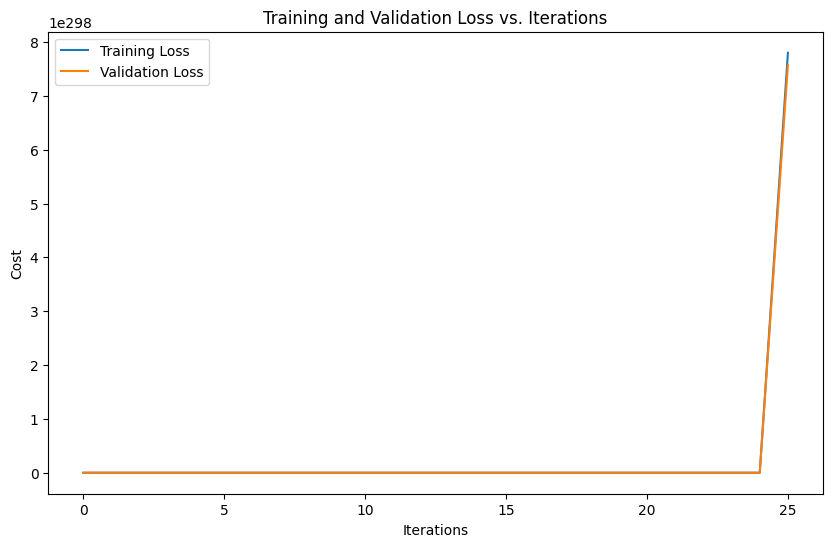

In [4]:
#1a

# Load the data
data = pd.read_csv("assets/Housing.csv")
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a column of ones to X for the bias term
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_val = np.column_stack((np.ones(X_val.shape[0]), X_val))

# Initialize theta
theta = np.zeros(X_train.shape[1])

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Run gradient descent
theta, train_cost_history, val_cost_history = gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, iterations)

# Compute final training and validation costs
final_train_cost = train_cost_history[-1]
final_val_cost = val_cost_history[-1]

print(f"Final training cost: {final_train_cost}")
print(f"Final validation cost: {final_val_cost}")

# Plot training and validation costs
plt.figure(figsize=(10, 6))
plt.plot(train_cost_history, label='Training Loss')
plt.plot(val_cost_history, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss vs. Iterations')
plt.legend()
plt.show()

/tmp/ipykernel_25805/2357520653.py:15: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
/tmp/ipykernel_25805/2357520653.py:28: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradients


Final training cost: nan
Final validation cost: nan


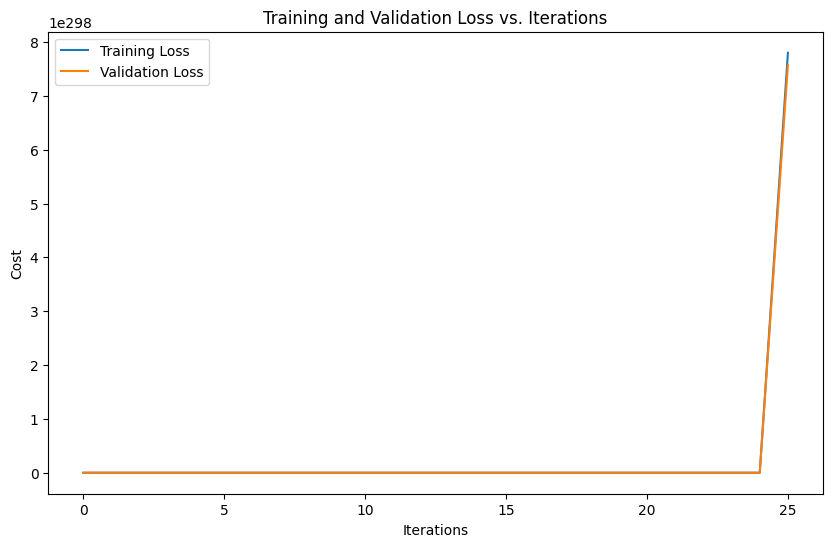

In [5]:
#1b
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad','guestroom','basement','hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
y = data['price'].values

#Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a column of ones to X for the bias term
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_val = np.column_stack((np.ones(X_val.shape[0]), X_val))

# Initialize theta
theta = np.zeros(X_train.shape[1])

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Run gradient descent
theta, train_cost_history, val_cost_history = gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, iterations)

# Compute final training and validation costs
final_train_cost = train_cost_history[-1]
final_val_cost = val_cost_history[-1]

print(f"Final training cost: {final_train_cost}")
print(f"Final validation cost: {final_val_cost}")

# Plot training and validation costs
plt.figure(figsize=(10, 6))
plt.plot(train_cost_history, label='Training Loss')
plt.plot(val_cost_history, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss vs. Iterations')
plt.legend()
plt.show()


Final training cost: 675004510848.4789
Final validation cost: 1146408168889.5422


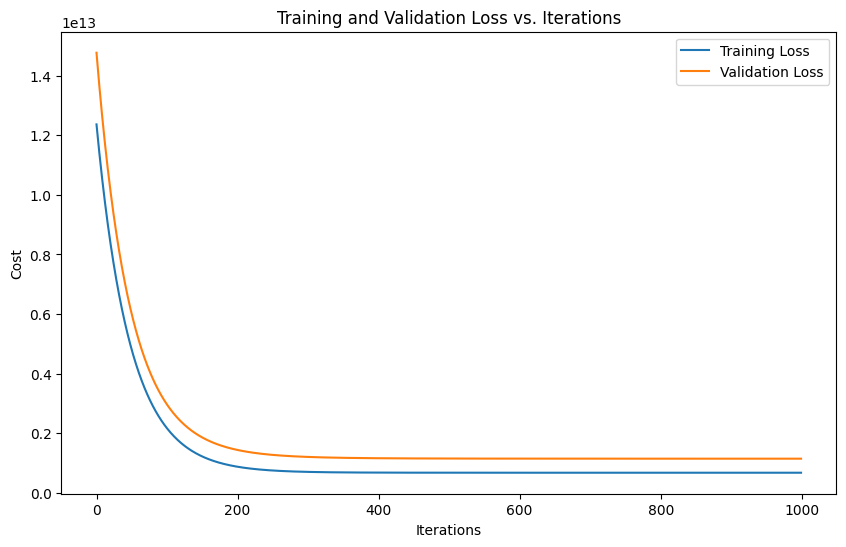

In [6]:
#2a standarization


# Load the data
data = pd.read_csv("assets/Housing.csv")
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Add a column of ones to X for the bias term
X_train_scaled = np.column_stack((np.ones(X_train_scaled.shape[0]), X_train_scaled))
X_val_scaled = np.column_stack((np.ones(X_val_scaled.shape[0]), X_val_scaled))

# Initialize theta
theta = np.zeros(X_train_scaled.shape[1])

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Run gradient descent
theta, train_cost_history, val_cost_history = gradient_descent(X_train_scaled, y_train, X_val_scaled, y_val, theta, learning_rate, iterations)

# Compute final training and validation costs
final_train_cost = train_cost_history[-1]
final_val_cost = val_cost_history[-1]

print(f"Final training cost: {final_train_cost}")
print(f"Final validation cost: {final_val_cost}")

# Plot training and validation costs
plt.figure(figsize=(10, 6))
plt.plot(train_cost_history, label='Training Loss')
plt.plot(val_cost_history, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss vs. Iterations')
plt.legend()
plt.show()

Final training cost: 849748793747.9463
Final validation cost: 1458033578362.7139


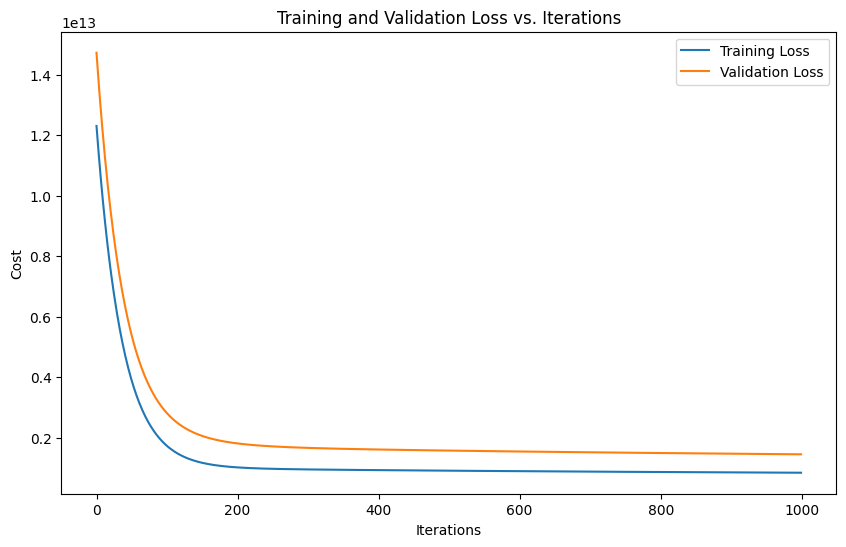

In [7]:
#2a normalization
# Load the data
data = pd.read_csv("assets/Housing.csv")
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)

# Add a column of ones to X for the bias term
X_train_normalized = np.column_stack((np.ones(X_train_normalized.shape[0]), X_train_normalized))
X_val_normalized = np.column_stack((np.ones(X_val_normalized.shape[0]), X_val_normalized))

# Initialize theta
theta = np.zeros(X_train_normalized.shape[1])

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Run gradient descent
theta, train_cost_history, val_cost_history = gradient_descent(X_train_normalized, y_train, X_val_normalized, y_val, theta, learning_rate, iterations)

# Compute final training and validation costs
final_train_cost = train_cost_history[-1]
final_val_cost = val_cost_history[-1]

print(f"Final training cost: {final_train_cost}")
print(f"Final validation cost: {final_val_cost}")

# Plot training and validation costs
plt.figure(figsize=(10, 6))
plt.plot(train_cost_history, label='Training Loss')
plt.plot(val_cost_history, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss vs. Iterations')
plt.legend()
plt.show()

Final training cost: 546569632496.40454
Final validation cost: 938126901398.1565


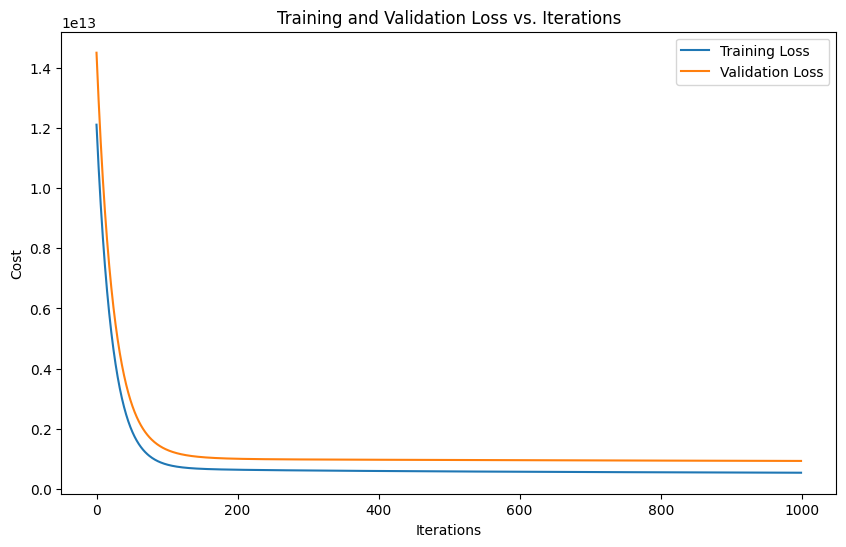

In [25]:
#2b standardization

# Separate numerical and categorical columns
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Standardize numerical features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

X = data[numerical_columns + categorical_columns].values
y = data['price'].values

#Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a column of ones to X for the bias term
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_val = np.column_stack((np.ones(X_val.shape[0]), X_val))

# Initialize theta
theta = np.zeros(X_train.shape[1])

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Run gradient descent
theta, train_cost_history, val_cost_history = gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, iterations)

# Compute final training and validation costs
final_train_cost = train_cost_history[-1]
final_val_cost = val_cost_history[-1]

print(f"Final training cost: {final_train_cost}")
print(f"Final validation cost: {final_val_cost}")

# Plot training and validation costs
plt.figure(figsize=(10, 6))
plt.plot(train_cost_history, label='Training Loss')
plt.plot(val_cost_history, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss vs. Iterations')
plt.legend()
plt.show()

Final training cost: 640942055907.615
Final validation cost: 1077541865435.6561


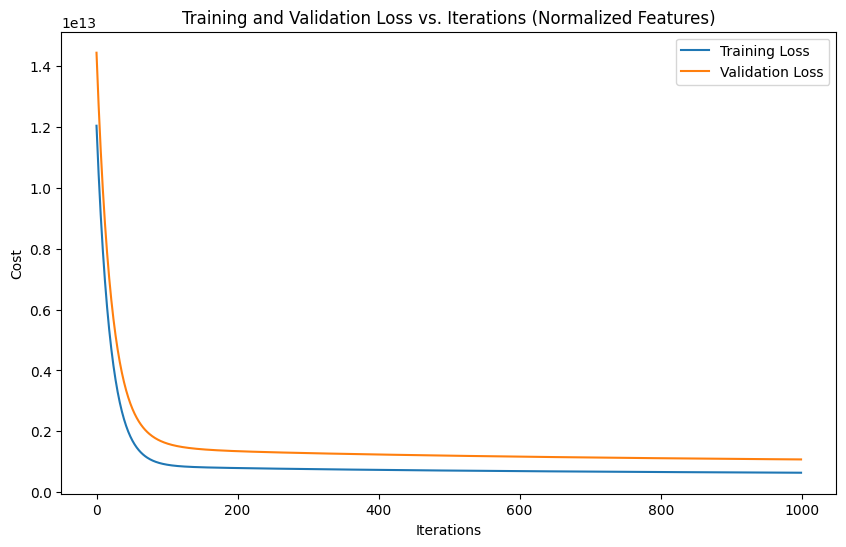

In [24]:

#2b normalize

# Separate numerical and categorical columns
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

y = data['price'].values

# Normalize numerical features
normalizer = MinMaxScaler()
data[numerical_columns] = normalizer.fit_transform(data[numerical_columns])

X = data[numerical_columns + categorical_columns].values

#Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a column of ones to X for the bias term
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_val = np.column_stack((np.ones(X_val.shape[0]), X_val))

# Initialize theta
theta = np.zeros(X_train.shape[1])

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Run gradient descent
theta, train_cost_history, val_cost_history = gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, iterations)

# Compute final training and validation costs
final_train_cost = train_cost_history[-1]
final_val_cost = val_cost_history[-1]

print(f"Final training cost: {final_train_cost}")
print(f"Final validation cost: {final_val_cost}")

# Plot training and validation costs
plt.figure(figsize=(10, 6))
plt.plot(train_cost_history, label='Training Loss')
plt.plot(val_cost_history, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss vs. Iterations (Normalized Features)')
plt.legend()
plt.show()


In [18]:

# add parameter penalty

def compute_cost(X, y, theta, lambda_param):
    m = len(y)
    predictions = predict(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    
    # Add L2 regularization term
    regularization = (lambda_param / (2 * m)) * np.sum(theta[1:]**2)  # Exclude bias term
    
    return cost + regularization

def gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, iterations, lambda_param):
    m = len(y_train)
    train_cost_history = []
    val_cost_history = []
    
    for _ in range(iterations):
        predictions = predict(X_train, theta)
        
        # Compute gradients with regularization
        gradients = (1/m) * np.dot(X_train.T, (predictions - y_train))
        gradients[1:] += (lambda_param / m) * theta[1:]  # Add regularization term, exclude bias
        
        # Update parameters
        theta -= learning_rate * gradients
        
        # Compute and store both training and validation costs
        train_cost = compute_cost(X_train, y_train, theta, lambda_param)
        val_cost = compute_cost(X_val, y_val, theta, lambda_param)
        train_cost_history.append(train_cost)
        val_cost_history.append(val_cost)
    
    return theta, train_cost_history, val_cost_history


Final training cost: 675125835789.5194
Final validation cost: 1146950189208.1655


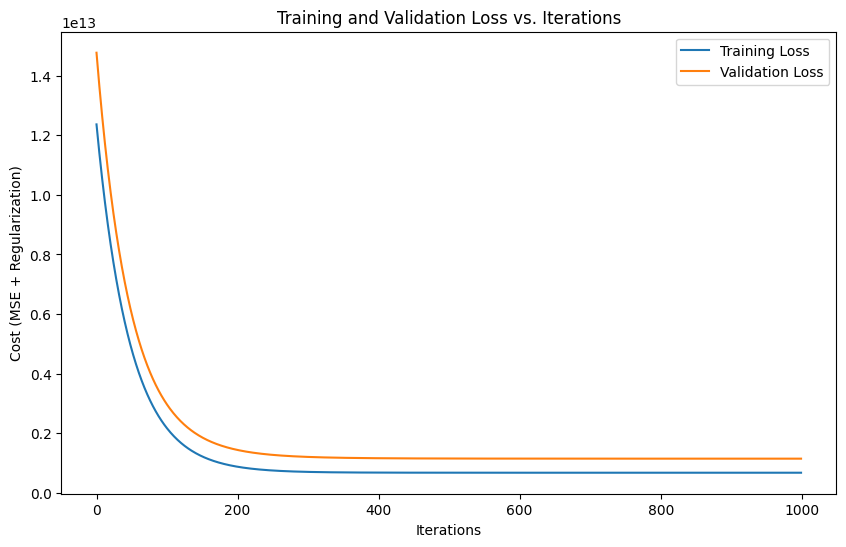

In [21]:
#3a standardize
# Load the data
data = pd.read_csv("assets/Housing.csv")
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize only the input features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)

# Add a column of ones to X for the bias term
X_train_scaled = np.column_stack((np.ones(X_train_scaled.shape[0]), X_train_scaled))
X_val_scaled = np.column_stack((np.ones(X_val_scaled.shape[0]), X_val_scaled))

# Initialize theta
theta = np.zeros(X_train_scaled.shape[1])

# Set hyperparameters
learning_rate = 0.01
iterations = 1000
lambda_param = 0.1 

# Run gradient descent
theta, train_cost_history, val_cost_history = gradient_descent(X_train_scaled, y_train, X_val_scaled, y_val, theta, learning_rate, iterations, lambda_param)

# Compute final training and validation costs
final_train_cost = compute_cost(X_train_scaled, y_train, theta, lambda_param)
final_val_cost = compute_cost(X_val_scaled, y_val, theta, lambda_param)

print(f"Final training cost: {final_train_cost}")
print(f"Final validation cost: {final_val_cost}")

# Plot training and validation costs
plt.figure(figsize=(10, 6))
plt.plot(train_cost_history, label='Training Loss')
plt.plot(val_cost_history, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE + Regularization)')
plt.title('Training and Validation Loss vs. Iterations')
plt.legend()
plt.show()

Final training cost: 851195559152.314
Final validation cost: 1463271395431.9944


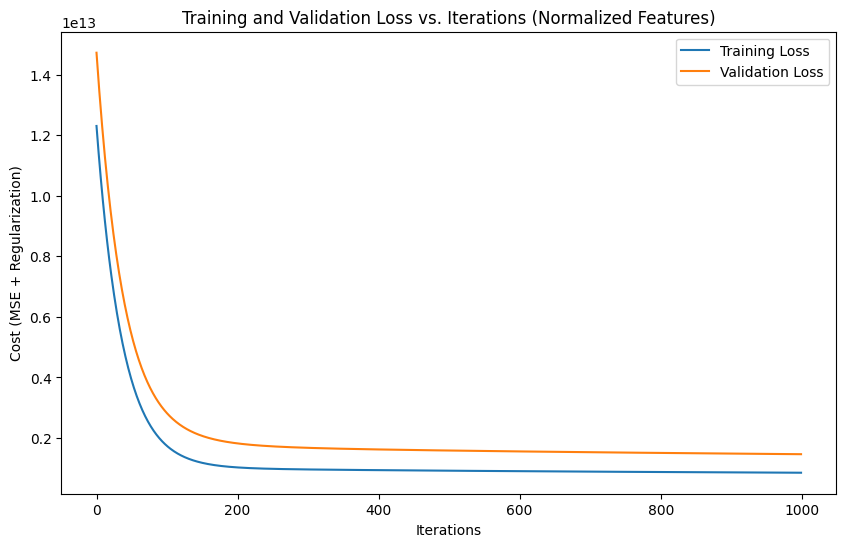

In [12]:
#3a normalize

# Load the data
data = pd.read_csv("assets/Housing.csv")
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = data['price'].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)

# Add a column of ones to X for the bias term
X_train_scaled = np.column_stack((np.ones(X_train_scaled.shape[0]), X_train_scaled))
X_val_scaled = np.column_stack((np.ones(X_val_scaled.shape[0]), X_val_scaled))

# Initialize theta
theta = np.zeros(X_train_scaled.shape[1])

# Set hyperparameters
learning_rate = 0.01  # You might need to adjust this
iterations = 1000
lambda_param = 0.1  # You might need to adjust this


# Run gradient descent
theta, train_cost_history, val_cost_history = gradient_descent(X_train_scaled, y_train, X_val_scaled, y_val, theta, learning_rate, iterations, lambda_param)

# Compute final training and validation costs
final_train_cost = compute_cost(X_train_scaled, y_train, theta, lambda_param)
final_val_cost = compute_cost(X_val_scaled, y_val, theta, lambda_param)

print(f"Final training cost: {final_train_cost}")
print(f"Final validation cost: {final_val_cost}")

# Plot training and validation costs
plt.figure(figsize=(10, 6))
plt.plot(train_cost_history, label='Training Loss')
plt.plot(val_cost_history, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE + Regularization)')
plt.title('Training and Validation Loss vs. Iterations (Normalized Features)')
plt.legend()
plt.show()

Final training cost: 546881461332.13745
Final validation cost: 939916457733.5739


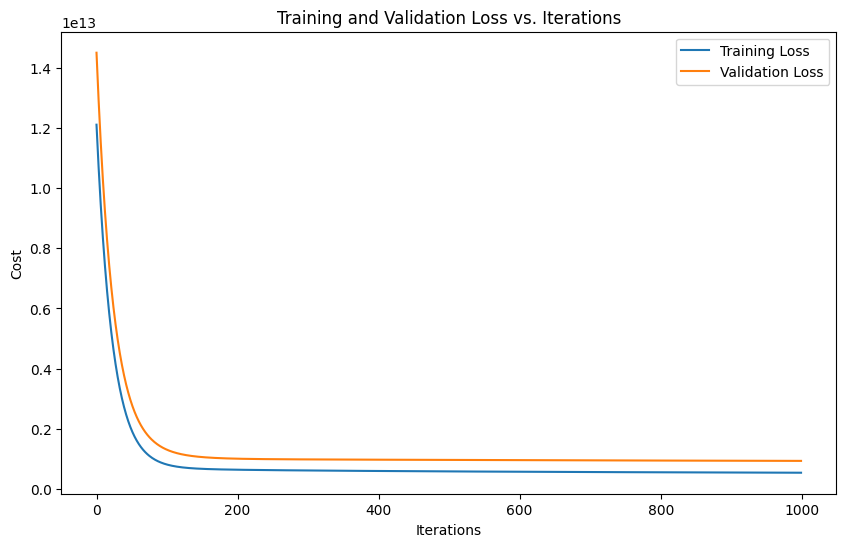

In [16]:
#3b standardization

# Separate numerical and categorical columns
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Standardize numerical features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

X = data[numerical_columns + categorical_columns].values

#Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a column of ones to X for the bias term
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_val = np.column_stack((np.ones(X_val.shape[0]), X_val))

# Initialize theta
theta = np.zeros(X_train.shape[1])

# Set hyperparameters
learning_rate = 0.01
iterations = 1000
lambda_param = .1

# Run gradient descent
theta, train_cost_history, val_cost_history = gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, iterations, lambda_param)

# Compute final training and validation costs
final_train_cost = train_cost_history[-1]
final_val_cost = val_cost_history[-1]

print(f"Final training cost: {final_train_cost}")
print(f"Final validation cost: {final_val_cost}")

# Plot training and validation costs
plt.figure(figsize=(10, 6))
plt.plot(train_cost_history, label='Training Loss')
plt.plot(val_cost_history, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss vs. Iterations')
plt.legend()
plt.show()

Final training cost: 642013729921.2283
Final validation cost: 1081820135862.681


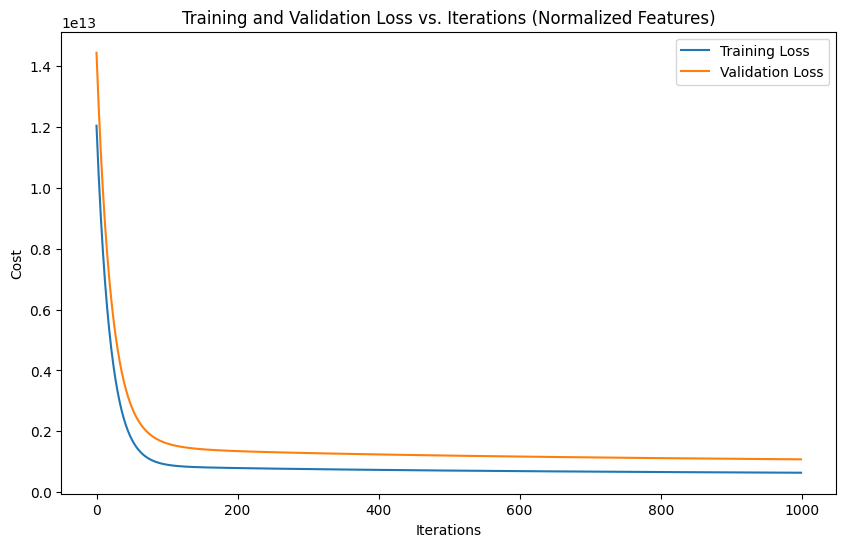

In [15]:
#3b normalization

# Separate numerical and categorical columns
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Normalize numerical features
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

X = data[numerical_columns + categorical_columns].values


#Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a column of ones to X for the bias term
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_val = np.column_stack((np.ones(X_val.shape[0]), X_val))

# Initialize theta
theta = np.zeros(X_train.shape[1])

# Set hyperparameters
learning_rate = 0.01
iterations = 1000
lambda_param = .1

# Run gradient descent
theta, train_cost_history, val_cost_history = gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, iterations, lambda_param)

# Compute final training and validation costs
final_train_cost = train_cost_history[-1]
final_val_cost = val_cost_history[-1]

print(f"Final training cost: {final_train_cost}")
print(f"Final validation cost: {final_val_cost}")

# Plot training and validation costs
plt.figure(figsize=(10, 6))
plt.plot(train_cost_history, label='Training Loss')
plt.plot(val_cost_history, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss vs. Iterations (Normalized Features)')
plt.legend()
plt.show()